**TP1**

**Parte 1: Imágenes en /white_patch  y  /coord_cromaticas**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Primero verificamos en qué espacio de color se encuentra la matriz de píxeles de la imagen que vamos a cargar

In [ ]:
# Defino una función llamada "espacio de color de la imagen" que toma un parámetro "ruta de la imagen"
# objetivo: determinar el espacio de color de una imagen dada una ruta de archivo
def espacio_color_imagen(ruta_imagen):
    # Cargamos la imagen
    # Imread_unchanged: Nos asegura que se lea la imagen, sin modificar su formato
    imagen = cv2.imread(ruta_imagen, cv2.IMREAD_UNCHANGED)

    # Verificamos si la imagen se cargó correctamente
    if imagen is None:
        return None, "Error: La imagen no se pudo cargar , por favor verificar la ruta del archivo"

    # Verificamos el número de canales
    if len(imagen.shape) == 2:
        return imagen, "La imagen está en escala de grises"
    elif len(imagen.shape) == 3:
        # Si el tercer canal tiene 3 valores
        if imagen.shape[2] == 3:
            return imagen, "La imagen está en el espacio de color RGB."
        # Si el tercer canal tiene 4 valores
        elif imagen.shape[2] == 4:
            return imagen, "La imagen está en el espacio de color RGBA."
        else:
        # Si el número de canales no es 3 ni 4
            return imagen, "La imagen tiene un número de canales no estándar."
    else:
        # Si la imagen no cumple con ninguna de las condiciones anteriores
        return None, "Formato de imagen no soportado."

**1) Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste**

In [ ]:
# Defino una función para convertir una imagen en formato RGB a coordenadas cromáticas
def rgb_a_cromaticas(imagen):
    # Convertimos la imagen a un tipo de dato flotante
    # Necesario: Para realizar cálculos precisos y evitar problemas de redondeo con valores enteros
    imagen_float = imagen.astype(np.float32)

    # Sumamos los valores de los canales
    # Keepdims true: Para mantener las dimensiones originales de la imagen
    suma_canales = imagen_float.sum(axis=2, keepdims=True)

    # Evitamos las divisiones por cero
    # Reemplazamos la suma de los canales que son cero por uno
    suma_canales[suma_canales == 0] = 1

    # Calculamos las coordenadas cromáticas
    # Objetivo: Normalizar los valores para obtener las proporciones de cada canal de color en cada píxel
    coor_cromaticas = imagen_float/suma_canales

    # Retorno de las coordenadas cromáticas
    return coor_cromaticas

**2) Implementar el algoritmo White Patch para librarnos de las diferencias de
color de iluminación**

In [ ]:
# Defino una función para cargar y corregir el punto blanco (o el color mas brillante) de una imagen
def white_patch(imagen):
    try:
        # Convertimos la imagen a formato de punto flotante para cálculos precisos
        imagen_float = imagen.astype(np.float32) / 255.0

        # Encontramos el valor máximo en cada canal de color
        # Objetivo: para identificar el punto blanco o el color mas brillante en cada canal
        valor_maximo = np.max(imagen_float, axis=(0, 1))

        # Calculamos los factores de escala para cada canal
        # Objetivo: ajustar los valores de los canales para corregir cualquier desviación del blanco
        factores_escala = 1.0 / valor_maximo

        # Aplicamos la corrección de punto blanco multiplicando por los factores de escala
        correccion_imagen = (imagen_float * factores_escala).clip(0, 1)  # Clip para asegurar valores válidos

        # Convertir de nuevo a formato de 8 bits sin signo (0-255)
        correccion_imagen = (correccion_imagen * 255).astype(np.uint8)

        return correccion_imagen
    # Si existiera algún error durante el procesamiento, capturamos la excepción y muestra un mensaje de error
    except Exception as e:
        print(f"Error al procesar la imagen: {str(e)}")
        return None

**3)Mostrar los resultados obtenidos y analizar las posibles fallas(si es que las hay) en el caso de White patch**

Imagen convertida de RGBA a RGB


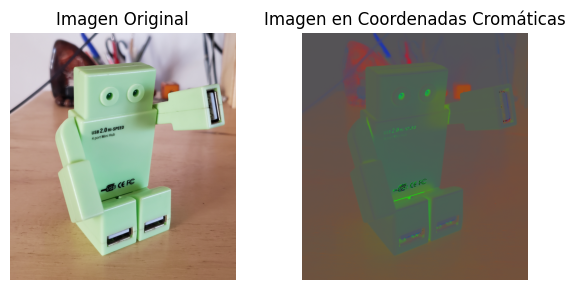

Imagen convertida de RGBA a RGB


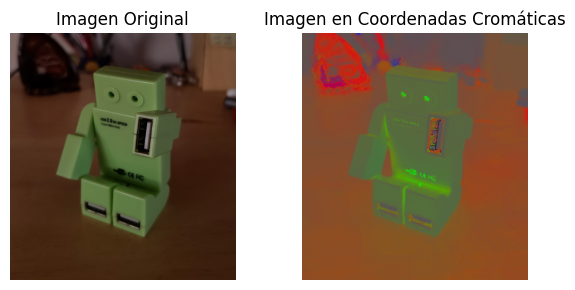

Imagen convertida de RGBA a RGB


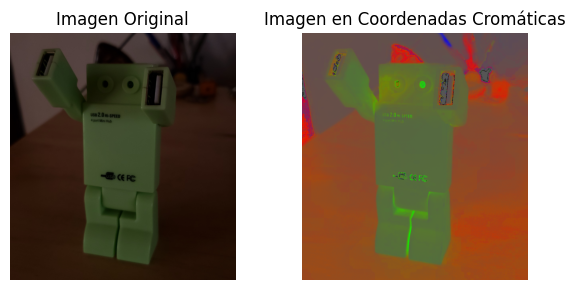

In [ ]:
# Creamos una función para mostrar una imagen con Matplotlib
def plot_image(imagen, titulo, indice):
    plt.subplot(1, 2, indice)
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.title(titulo)
    plt.axis('off')

# Listamos las imágenes
lista_imagenes=['CoordCrom_1.png','CoordCrom_2.png','CoordCrom_3.png']

# Procesamos cada imagen
for imagen in lista_imagenes:
    # Verificamos el espacio de color de la imagen
    imagen,resultado = espacio_color_imagen(imagen)
    #print(f"Imagen: {imagen} - {resultado}")

    if imagen is not None:
        if 'RGB' in resultado:
            if 'RGBA' in resultado:
                # Convertimos de RGBA a RGB (eliminamos el canal alfa)
                imagen = cv2.cvtColor(imagen, cv2.COLOR_BGRA2BGR)
                print("\033[94mImagen convertida de RGBA a RGB\033[0m")

            # Convertimos la imagen a coordenadas cromáticas
            imagen_coor_cromaticas = rgb_a_cromaticas(imagen)

            # Mostrar la imagen original y la imagen en coordenadas cromáticas
            plt.figure(figsize=(6,3))
            plot_image(imagen, 'Imagen Original', 1)
            plot_image(imagen_coor_cromaticas, 'Imagen en Coordenadas Cromáticas', 2)
            plt.tight_layout()
            plt.show()
        else:
            print("La imagen no está en el espacio de color RGB o RGBA, no se puede convertir a coordenadas cromáticas.")

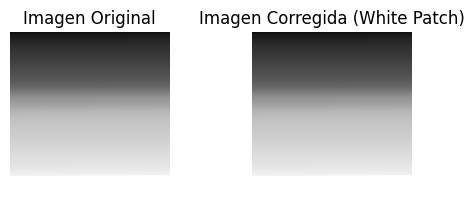

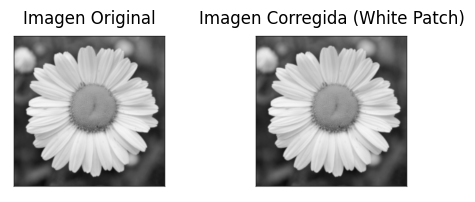

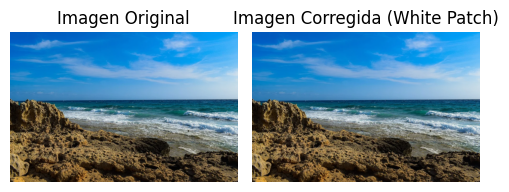

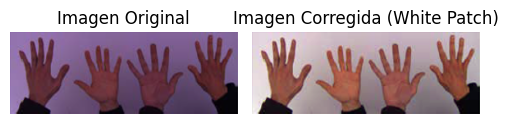

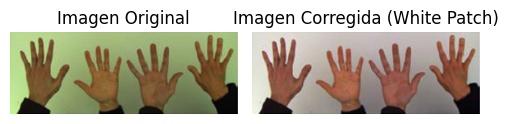

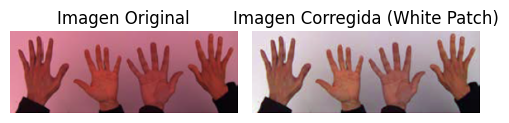

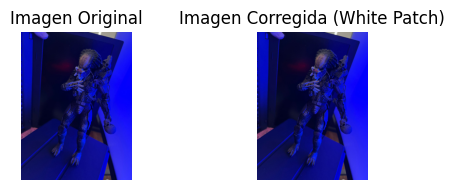

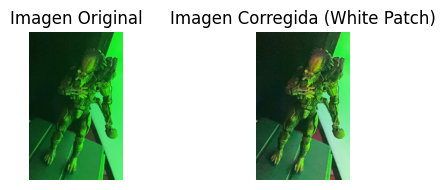

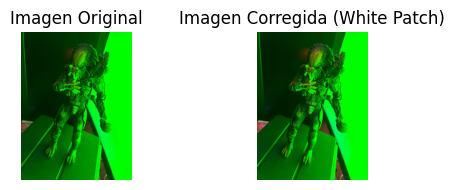

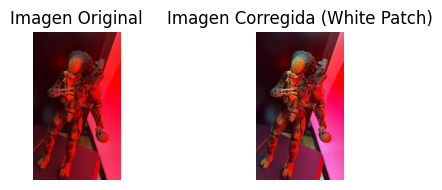

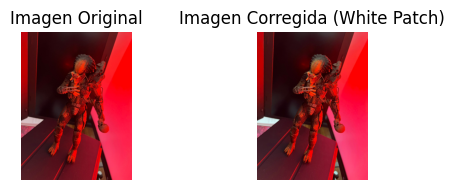

In [ ]:
# Creamos una función para mostrar la imagen original y la imagen corregida
def plot_images(imagen_original, imagen_corregida):
    plt.figure(figsize=(5,2))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(imagen_corregida, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Corregida (White Patch)')
    plt.axis('off')

    # Ajustamos el espacio entre los subplots
    plt.subplots_adjust(wspace=1)

    plt.tight_layout()
    plt.show()

# Listamos las imágenes a procesar
lista_imagenes = ['img1_tp.png','img2_tp.png','segmentacion.png','test_blue.png','test_green.png','test_red.png',
               'wp_blue.jpg','wp_green.png','wp_green2.jpg','wp_red.png','wp_red2.jpg']

# Procesar cada imagen en la lista
for imagen in lista_imagenes:
    # Cargamos la imagen uno por uno de acuerdo al listado de imagenes
    imagen = cv2.imread(imagen, cv2.IMREAD_COLOR)

    # Verificamos si la imagen se cargó correctamente
    if imagen is None:
        print(f"No se pudo cargar la imagen {imagen}")
        continue

    # Aplicamos la corrección de punto blanco
    imagen_corregida = white_patch(imagen)

    # Mostramos la imagen original y la imagen corregida
    if imagen_corregida is not None:
        plot_images(imagen, imagen_corregida)
    else:
        print(f"No se pudo corregir la imagen {imagen}")


**Parte 2.**

**1)Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grises y visualizarlas.**

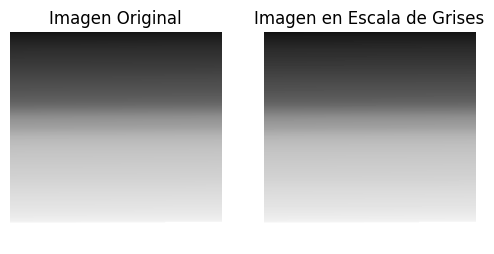

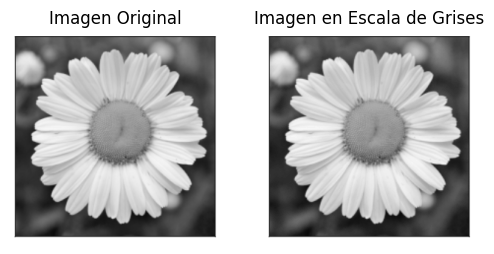

In [ ]:
# Listamos las imágenes
lista_imagenes = ['img1_tp.png', 'img2_tp.png']

# Creamos un bucle para iterar sobre la lista de imágenes
for imagen in lista_imagenes:
    # Leemos la imagen original y la imagen en escala de grises
    imagen_original = cv2.imread(imagen)
    imagen_grises = cv2.imread(imagen, cv2.IMREAD_GRAYSCALE)

    # Verificamos si las imágenes se han cargado correctamente
    if imagen_original is None or imagen_grises is None:
        print(f"Error al cargar la imagen {imagen}")
    else:
        plt.figure(figsize=(6,3))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB))
        plt.title('Imagen Original')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(imagen_grises, cmap='gray')
        plt.title('Imagen en Escala de Grises')
        plt.axis('off')

        plt.show()

**2)Elija el número de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede  ser de utilidad tomar como "features" a los histogramas?**

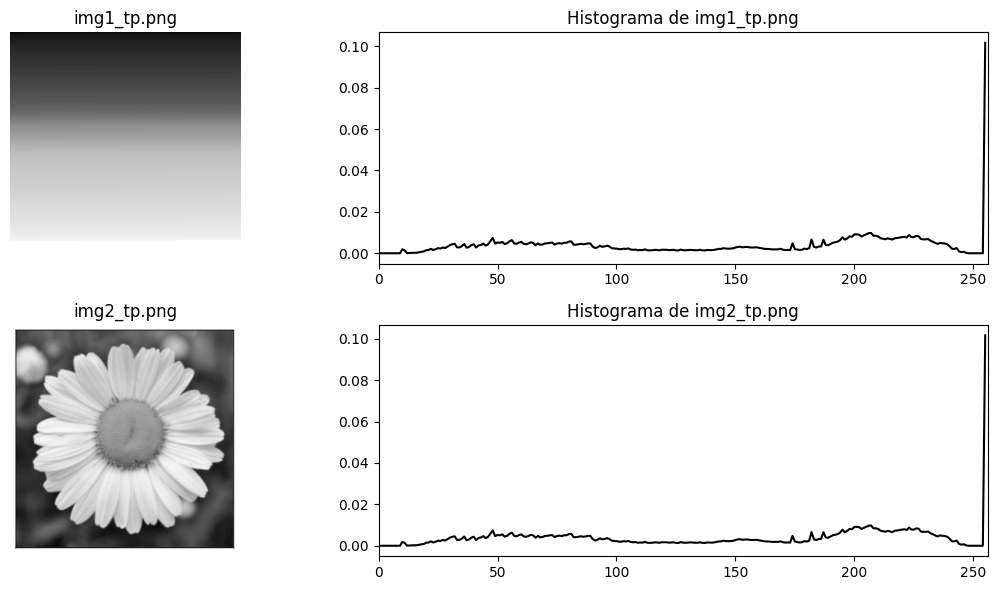

In [ ]:
# Lista de imágenes
lista_imagenes = ['img1_tp.png', 'img2_tp.png']

# Elegí 256 bins: precisión y eficiencia para análisis de histogramas
bins = 256

# Creamos un bucle para iterar sobre la lista de imágenes
for i in range(len(lista_imagenes) - 1):
    # Leemos las imágenes
    imagen1 = cv2.imread(lista_imagenes[i], cv2.IMREAD_GRAYSCALE)
    imagen2 = cv2.imread(lista_imagenes[i + 1], cv2.IMREAD_GRAYSCALE)

    # Verificamos si las imágenes se han cargado correctamente
    if imagen1 is None or imagen2 is None:
        print("Error al cargar una o ambas imágenes")
    else:
        # Calculamos los histogramas
        hist_img1 = cv2.calcHist([imagen1], [0], None, [bins], [0, 256])
        hist_img2 = cv2.calcHist([imagen2], [0], None, [bins], [0, 256])

        # Normalizamos los histogramas para mejor comparación
        hist_img1 = hist_img1 / hist_img1.sum()
        hist_img2 = hist_img2 / hist_img2.sum()

        # Graficamos las imágenes y sus histogramas
        plt.figure(figsize=(12, 6))

        # Mostramos la imagen1 y su histograma respectiva
        plt.subplot(2, 2, 1)
        plt.imshow(imagen1, cmap='gray')
        plt.title(lista_imagenes[i])
        plt.axis('off')

        plt.subplot(2, 2, 2)
        plt.plot(hist_img1, color='black')
        plt.title('Histograma de ' + lista_imagenes[i])
        plt.xlim([0, bins])

        # Mostramos la imagen2 y su histograma respectiva
        plt.subplot(2, 2, 3)
        plt.imshow(imagen2, cmap='gray')
        plt.title(lista_imagenes[i + 1])
        plt.axis('off')

        plt.subplot(2, 2, 4)
        plt.plot(hist_img2, color='black')
        plt.title('Histograma de ' + lista_imagenes[i + 1])
        plt.xlim([0, bins])

        plt.tight_layout()
        plt.show()

Los histogramas de ambas imágenes son muy similares, mostrando una distribución casi uniforme con un pico en 255, indicando una alta presencia de píxeles blancos. Esto sugiere que, en este caso, los histogramas no son útiles para distinguir las imágenes. En conclusión, no considero que sea de utilidad tomar como features a los histogramas.

**3) Para la imagen segmentación.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua,cielo,tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.**

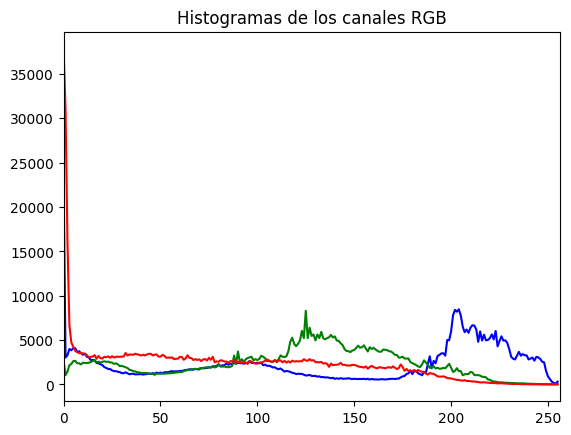

In [ ]:
# Leemos la imagen
imagen = cv2.imread('segmentacion.png')

# Calculamos los histogramas de los canales RGB
# Creamos una tupla que contiene los colores azul, verde y rojo
colors = ('b', 'g', 'r')
for i, color in enumerate(colors):
    # Calcula el histograma del canal RGB correspondiente al índice i de la imagen
    hist = cv2.calcHist([imagen], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
plt.title('Histogramas de los canales RGB')
plt.show()

**Histograma de los canales RGB de la imagen "segmentación.png"**
* El canal rojo (R) tiene un pico en el rango de 0-10, lo que sugiere que el cielo y el agua están presentes en la imagen, ya que estos elementos suelen tener tonos rojizos muy bajos.
* El canal verde (G) tiene un pico en el rango de 100-150, lo que sugiere que la vegetación o la tierra están presentes en la imagen, ya que estos elementos suelen tener tonos verdes medianos a altos.
* El canal azul (B) tiene un pico en el rango de 200-220, lo que sugiere que el cielo y el agua están presentes en la imagen, ya que estos elementos suelen tener tonos azulados muy altos.

En conclusión: la imagen presenta un patrón de color cálido, con una dominancia de tonos rojos y verdes, y una presencia significativa de tonos azules oscuros. El contraste es moderado, con una iluminación natural y suave.

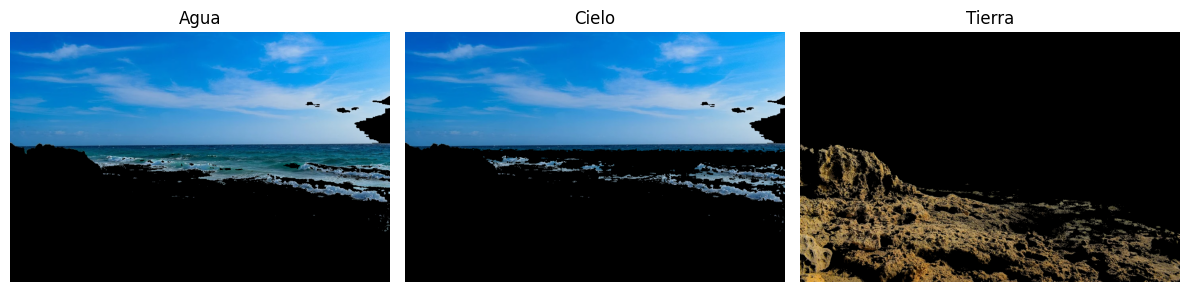

In [ ]:
# Convertimos la imagen a espacio de color HSV para facilitar la segmentación
hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

# Definimos los umbrales de color para cada región
# Definimos el rango de colores para el agua
lower_agua = np.array([90, 50, 50])
upper_agua = np.array([130, 255, 255])
# Definimos el rango de colores para el cielo
lower_cielo= np.array([100, 50, 50])
upper_cielo = np.array([140, 255, 255])
# Definimos el rango de colores para la tierra
lower_tierra = np.array([0, 50, 50])
upper_tierra = np.array([30, 255, 255])

# Creamos las máscaras para cada región
mascara_agua = cv2.inRange(hsv, lower_agua, upper_agua)
mascara_cielo = cv2.inRange(hsv, lower_cielo, upper_cielo)
mascara_tierra = cv2.inRange(hsv, lower_tierra, upper_tierra)

# Aplicamos las máscaras para obtener las regiones segmentadas
resultado_agua = cv2.bitwise_and(imagen, imagen, mask=mascara_agua)
resultado_cielo= cv2.bitwise_and(imagen, imagen, mask=mascara_cielo)
resultado_tierra = cv2.bitwise_and(imagen, imagen, mask=mascara_tierra)

# Mostramos las regiones segmentadas
plt.figure(figsize=(12,5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(resultado_agua, cv2.COLOR_BGR2RGB))
plt.title('Agua')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(resultado_cielo, cv2.COLOR_BGR2RGB))
plt.title('Cielo')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(resultado_tierra, cv2.COLOR_BGR2RGB))
plt.title('Tierra')
plt.axis('off')

plt.tight_layout()
plt.show()

Los umbrales obtenidos del histograma de canales RGB no produjeron resultados satisfactorios en la segmentación de la imagen. realicé ajustes manuales para encontrar los umbrales óptimos. Los umbrales manuales permitieron una segmentación buenas de las regiones de agua, cielo y tierra. La experiencia demostró que el histograma de canales RGB no siempre es suficiente para obtener resultados precisos.

* En la primera imagen, no fue posible separar completamente la región de agua con la región de cielo utilizando los umbrales de color. Esto se debió a que los tonos de azul del agua y del cielo son similares, lo que hizo difícil establecer un umbral claro para diferenciar entre ambas regiones. Como resultado, la primera imagen muestra una combinación de ambas regiones, agua y cielo."
* En cambio, en la segunda imagen, se logró separar con algo de éxito la región de cielo utilizando los umbrales de color ajustados. Esto se debió a que el cielo tiene un tono de azul más claro y uniforme, lo que permitió establecer un umbral claro para diferenciarlo de las otras regiones.
* En la tercera imagen, se logró separar con éxito la región de tierra utilizando los umbrales de color ajustados. Esto se debió a que la tierra tiene un tono de marrón y verde más oscuro y distinto, lo que permitió establecer un umbral claro para diferenciarlo de las otras regiones.